# Predicting Financial Time Series Data with Machine Learning

This is a sample that predicts future price behaviour from past price movements.
Here we implement it with USD/CAD rate as an example, but you can convert it to other market prices by getting other csv files.




In [1]:
import datetime
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingClassifier

from sklearn import ensemble

## Structuring data

In [2]:
h = pd.read_csv('USDCAD_Candlestick_1_Hour_BID_15.03.2017-15.03.2019.csv')
o = pd.read_csv('BRENT.CMDUSD_Candlestick_1_Hour_BID_15.03.2017-15.03.2019.csv')

In [3]:
# Put USD/CAD hour data into Pandas Dataframe

df = pd.DataFrame(h)
display(df.head())
display(df.tail())

,Gmt time,Open,High,Low,Close,Volume
0,16.03.2017 00:00:00.000,1.32954,1.32965,1.32827,1.32915,6.151050e+09
1,16.03.2017 01:00:00.000,1.32914,1.33041,1.32850,1.33028,4.317090e+09
2,16.03.2017 02:00:00.000,1.33026,1.33077,1.32968,1.32988,3.679970e+09
3,16.03.2017 03:00:00.000,1.32988,1.33125,1.32979,1.33078,4.177330e+09
4,16.03.2017 04:00:00.000,1.33078,1.33106,1.33045,1.33102,3.826610e+09


,Gmt time,Open,High,Low,Close,Volume
17539,16.03.2019 19:00:00.000,1.33342,1.33342,1.33342,1.33342,0.0
17540,16.03.2019 20:00:00.000,1.33342,1.33342,1.33342,1.33342,0.0
17541,16.03.2019 21:00:00.000,1.33342,1.33342,1.33342,1.33342,0.0
17542,16.03.2019 22:00:00.000,1.33342,1.33342,1.33342,1.33342,0.0
17543,16.03.2019 23:00:00.000,1.33342,1.33342,1.33342,1.33342,0.0


In [4]:
# Oil data

df_oil = pd.DataFrame(o)
display(df_oil.head())
display(df_oil.tail())

,Gmt time,Open,High,Low,Close,Volume
0,16.03.2017 00:00:00.000,51.975,51.975,51.975,51.975,0.0000
1,16.03.2017 01:00:00.000,52.065,52.185,52.045,52.115,6294.0000
2,16.03.2017 02:00:00.000,52.125,52.145,52.055,52.105,3739.0001
3,16.03.2017 03:00:00.000,52.105,52.135,52.065,52.115,4739.0000
4,16.03.2017 04:00:00.000,52.110,52.125,52.075,52.105,1309.0000


,Gmt time,Open,High,Low,Close,Volume
17539,16.03.2019 19:00:00.000,67.005,67.005,67.005,67.005,0.0
17540,16.03.2019 20:00:00.000,67.005,67.005,67.005,67.005,0.0
17541,16.03.2019 21:00:00.000,67.005,67.005,67.005,67.005,0.0
17542,16.03.2019 22:00:00.000,67.005,67.005,67.005,67.005,0.0
17543,16.03.2019 23:00:00.000,67.005,67.005,67.005,67.005,0.0


In [5]:
# Set the date as datetime
df['datetime'] = pd.to_datetime(df['Gmt time'])

In [6]:
df = df.set_index(df['datetime'])
df.index.names = [None]


In [7]:
# Set datetime for oil

df_oil['datetime'] = pd.to_datetime(df_oil['Gmt time'])
df_oil = df_oil.set_index(df_oil['datetime'])
df_oil.index.names = [None]


In [10]:
df_oil = df.loc[:,['Open', 'High', 'Low', 'Close', 'Volume']]

df_oil = df_oil.rename(columns={'Open': 'Open_oil', 'High': 'High_oil', 'Low':'Low_oil', 'Close':'Close_oil', 'Volume':'Volume_oil'})

df_oil.tail()

,Open_oil,High_oil,Low_oil,Close_oil,Volume_oil
2019-03-16 19:00:00,1.33342,1.33342,1.33342,1.33342,0.0
2019-03-16 20:00:00,1.33342,1.33342,1.33342,1.33342,0.0
2019-03-16 21:00:00,1.33342,1.33342,1.33342,1.33342,0.0
2019-03-16 22:00:00,1.33342,1.33342,1.33342,1.33342,0.0
2019-03-16 23:00:00,1.33342,1.33342,1.33342,1.33342,0.0


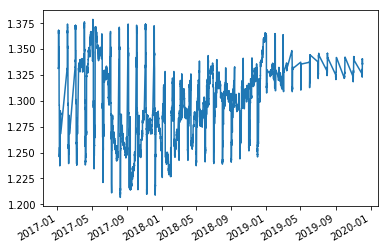

In [11]:
# Just some exploration 

df['Close'].plot()

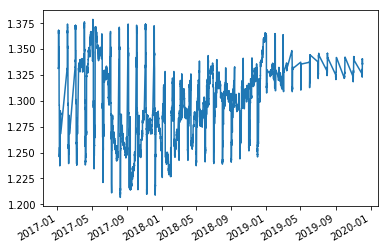

In [12]:
df_oil['Close_oil'].plot()

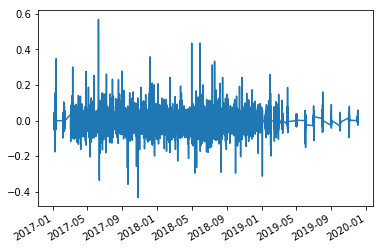

In [13]:
# Create return (open-close) normalized

df['return_next'] = df['Open'].shift(-1) - df['Close'].shift(-1)
return_range = df['return_next'].max() - df['return_next'].min()
df['return_next'] = df['return_next'] / return_range

df['return'] = df['Open'] - df['Close']
return_range = df['return'].max() - df['return'].min()
df['return'] = df['return'] / return_range

# If return > 0, green; otherwise, red

df['return'].plot()

In [14]:
# Make label, 1 as rising price, 0 as falling price - prediction for the following timestamp
# ****************** consider when return ==0 next version

df['label'] = df['return_next'].apply(lambda x: 1 if x>0.0 else 0)
df.tail(10)

,Gmt time,Open,High,Low,Close,Volume,datetime,return_next,return,label
2019-03-16 14:00:00,16.03.2019 14:00:00.000,1.33342,1.33342,1.33342,1.33342,0.0,2019-03-16 14:00:00,0.0,0.0,0
2019-03-16 15:00:00,16.03.2019 15:00:00.000,1.33342,1.33342,1.33342,1.33342,0.0,2019-03-16 15:00:00,0.0,0.0,0
2019-03-16 16:00:00,16.03.2019 16:00:00.000,1.33342,1.33342,1.33342,1.33342,0.0,2019-03-16 16:00:00,0.0,0.0,0
2019-03-16 17:00:00,16.03.2019 17:00:00.000,1.33342,1.33342,1.33342,1.33342,0.0,2019-03-16 17:00:00,0.0,0.0,0
2019-03-16 18:00:00,16.03.2019 18:00:00.000,1.33342,1.33342,1.33342,1.33342,0.0,2019-03-16 18:00:00,0.0,0.0,0
2019-03-16 19:00:00,16.03.2019 19:00:00.000,1.33342,1.33342,1.33342,1.33342,0.0,2019-03-16 19:00:00,0.0,0.0,0
2019-03-16 20:00:00,16.03.2019 20:00:00.000,1.33342,1.33342,1.33342,1.33342,0.0,2019-03-16 20:00:00,0.0,0.0,0
2019-03-16 21:00:00,16.03.2019 21:00:00.000,1.33342,1.33342,1.33342,1.33342,0.0,2019-03-16 21:00:00,0.0,0.0,0
2019-03-16 22:00:00,16.03.2019 22:00:00.000,1.33342,1.33342,1.33342,1.33342,0.0,2019-03-16 22:00:00,0.0,0.0,0
2019-03-16 23:00:00,16.03.2019 23:00:00.000,1.33342,1.33342,1.33342,1.33342,0.0,2019-03-16 23:00:00,NaN,0.0,0


In [15]:
# The last register shows a NaN

df.dropna(inplace=True)
df.tail()

,Gmt time,Open,High,Low,Close,Volume,datetime,return_next,return,label
2019-03-16 18:00:00,16.03.2019 18:00:00.000,1.33342,1.33342,1.33342,1.33342,0.0,2019-03-16 18:00:00,0.0,0.0,0
2019-03-16 19:00:00,16.03.2019 19:00:00.000,1.33342,1.33342,1.33342,1.33342,0.0,2019-03-16 19:00:00,0.0,0.0,0
2019-03-16 20:00:00,16.03.2019 20:00:00.000,1.33342,1.33342,1.33342,1.33342,0.0,2019-03-16 20:00:00,0.0,0.0,0
2019-03-16 21:00:00,16.03.2019 21:00:00.000,1.33342,1.33342,1.33342,1.33342,0.0,2019-03-16 21:00:00,0.0,0.0,0
2019-03-16 22:00:00,16.03.2019 22:00:00.000,1.33342,1.33342,1.33342,1.33342,0.0,2019-03-16 22:00:00,0.0,0.0,0


In [16]:
df2 = df.copy()

df = df.loc[:,['Open', 'High', 'Low', 'Close', 'Volume', 'return', 'label']]
df.tail()

,Open,High,Low,Close,Volume,return,label
2019-03-16 18:00:00,1.33342,1.33342,1.33342,1.33342,0.0,0.0,0
2019-03-16 19:00:00,1.33342,1.33342,1.33342,1.33342,0.0,0.0,0
2019-03-16 20:00:00,1.33342,1.33342,1.33342,1.33342,0.0,0.0,0
2019-03-16 21:00:00,1.33342,1.33342,1.33342,1.33342,0.0,0.0,0
2019-03-16 22:00:00,1.33342,1.33342,1.33342,1.33342,0.0,0.0,0


In [17]:
df = pd.concat([df,df_oil],axis=1, join='inner')
df.head()

,Open,High,Low,Close,Volume,return,label,Open_oil,High_oil,Low_oil,Close_oil,Volume_oil
2017-03-16 00:00:00,1.32954,1.32965,1.32827,1.32915,6.151050e+09,0.012613,0,1.32954,1.32965,1.32827,1.32915,6.151050e+09
2017-03-16 01:00:00,1.32914,1.33041,1.32850,1.33028,4.317090e+09,-0.036869,1,1.32914,1.33041,1.32850,1.33028,4.317090e+09
2017-03-16 02:00:00,1.33026,1.33077,1.32968,1.32988,3.679970e+09,0.012290,0,1.33026,1.33077,1.32968,1.32988,3.679970e+09
2017-03-16 03:00:00,1.32988,1.33125,1.32979,1.33078,4.177330e+09,-0.029107,0,1.32988,1.33125,1.32979,1.33078,4.177330e+09
2017-03-16 04:00:00,1.33078,1.33106,1.33045,1.33102,3.826610e+09,-0.007762,1,1.33078,1.33106,1.33045,1.33102,3.826610e+09


In [18]:
# Creating datetime features


df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day

df['hour'] = df.index.hour


df.head()

,Open,High,Low,Close,Volume,return,label,Open_oil,High_oil,Low_oil,Close_oil,Volume_oil,year,month,day,hour
2017-03-16 00:00:00,1.32954,1.32965,1.32827,1.32915,6.151050e+09,0.012613,0,1.32954,1.32965,1.32827,1.32915,6.151050e+09,2017,3,16,0
2017-03-16 01:00:00,1.32914,1.33041,1.32850,1.33028,4.317090e+09,-0.036869,1,1.32914,1.33041,1.32850,1.33028,4.317090e+09,2017,3,16,1
2017-03-16 02:00:00,1.33026,1.33077,1.32968,1.32988,3.679970e+09,0.012290,0,1.33026,1.33077,1.32968,1.32988,3.679970e+09,2017,3,16,2
2017-03-16 03:00:00,1.32988,1.33125,1.32979,1.33078,4.177330e+09,-0.029107,0,1.32988,1.33125,1.32979,1.33078,4.177330e+09,2017,3,16,3
2017-03-16 04:00:00,1.33078,1.33106,1.33045,1.33102,3.826610e+09,-0.007762,1,1.33078,1.33106,1.33045,1.33102,3.826610e+09,2017,3,16,4


In [19]:
df.dtypes

# we have to change the volume type later

Open          float64
High          float64
Low           float64
Close         float64
Volume        float64
return        float64
label           int64
Open_oil      float64
High_oil      float64
Low_oil       float64
Close_oil     float64
Volume_oil    float64
year            int64
month           int64
day             int64
hour            int64
dtype: object

## Choosing a timeframe to trade

In [20]:
# Limiting the dataframe: from 3:00 to 12:00 (10 timestamps) 

df = df.between_time(include_start=True,include_end=True, start_time='03:00:00', end_time='12:00:00')
df.tail(20)

,Open,High,Low,Close,Volume,return,label,Open_oil,High_oil,Low_oil,Close_oil,Volume_oil,year,month,day,hour
2019-03-15 03:00:00,1.33125,1.33144,1.33064,1.33112,2.061980e+09,0.004204,0,1.33125,1.33144,1.33064,1.33112,2.061980e+09,2019,3,15,3
2019-03-15 04:00:00,1.33113,1.33141,1.33109,1.33117,1.476770e+09,-0.001294,1,1.33113,1.33141,1.33109,1.33117,1.476770e+09,2019,3,15,4
2019-03-15 05:00:00,1.33117,1.33128,1.33072,1.33075,1.786200e+09,0.013583,1,1.33117,1.33128,1.33072,1.33075,1.786200e+09,2019,3,15,5
2019-03-15 06:00:00,1.33075,1.33093,1.32977,1.33005,1.699220e+09,0.022639,1,1.33075,1.33093,1.32977,1.33005,1.699220e+09,2019,3,15,6
2019-03-15 07:00:00,1.33004,1.33022,1.32888,1.32971,3.803680e+09,0.010673,0,1.33004,1.33022,1.32888,1.32971,3.803680e+09,2019,3,15,7
2019-03-15 08:00:00,1.32968,1.32994,1.32933,1.32978,4.747920e+09,-0.003234,0,1.32968,1.32994,1.32933,1.32978,4.747920e+09,2019,3,15,8
2019-03-15 09:00:00,1.32978,1.33133,1.32965,1.33118,4.043030e+09,-0.045278,0,1.32978,1.33133,1.32965,1.33118,4.043030e+09,2019,3,15,9
2019-03-15 10:00:00,1.33118,1.33219,1.33103,1.33167,4.442590e+09,-0.015847,0,1.33118,1.33219,1.33103,1.33167,4.442590e+09,2019,3,15,10
2019-03-15 11:00:00,1.33167,1.33315,1.33138,1.33293,4.344820e+09,-0.040750,0,1.33167,1.33315,1.33138,1.33293,4.344820e+09,2019,3,15,11
2019-03-15 12:00:00,1.33293,1.33533,1.33239,1.33511,6.915150e+09,-0.070505,1,1.33293,1.33533,1.33239,1.33511,6.915150e+09,2019,3,15,12


In [21]:
# Make training and test dataset

df_test = df.loc['2019-03-15' ,:]  
display(df_test.head())
display(df_test.tail())

df_train = df.loc[:'2019-03-16',:] 
display(df_train.head())
display(df_train.tail())

,Open,High,Low,Close,Volume,return,label,Open_oil,High_oil,Low_oil,Close_oil,Volume_oil,year,month,day,hour
2019-03-15 03:00:00,1.33125,1.33144,1.33064,1.33112,2.061980e+09,0.004204,0,1.33125,1.33144,1.33064,1.33112,2.061980e+09,2019,3,15,3
2019-03-15 04:00:00,1.33113,1.33141,1.33109,1.33117,1.476770e+09,-0.001294,1,1.33113,1.33141,1.33109,1.33117,1.476770e+09,2019,3,15,4
2019-03-15 05:00:00,1.33117,1.33128,1.33072,1.33075,1.786200e+09,0.013583,1,1.33117,1.33128,1.33072,1.33075,1.786200e+09,2019,3,15,5
2019-03-15 06:00:00,1.33075,1.33093,1.32977,1.33005,1.699220e+09,0.022639,1,1.33075,1.33093,1.32977,1.33005,1.699220e+09,2019,3,15,6
2019-03-15 07:00:00,1.33004,1.33022,1.32888,1.32971,3.803680e+09,0.010673,0,1.33004,1.33022,1.32888,1.32971,3.803680e+09,2019,3,15,7


,Open,High,Low,Close,Volume,return,label,Open_oil,High_oil,Low_oil,Close_oil,Volume_oil,year,month,day,hour
2019-03-15 08:00:00,1.32968,1.32994,1.32933,1.32978,4.747920e+09,-0.003234,0,1.32968,1.32994,1.32933,1.32978,4.747920e+09,2019,3,15,8
2019-03-15 09:00:00,1.32978,1.33133,1.32965,1.33118,4.043030e+09,-0.045278,0,1.32978,1.33133,1.32965,1.33118,4.043030e+09,2019,3,15,9
2019-03-15 10:00:00,1.33118,1.33219,1.33103,1.33167,4.442590e+09,-0.015847,0,1.33118,1.33219,1.33103,1.33167,4.442590e+09,2019,3,15,10
2019-03-15 11:00:00,1.33167,1.33315,1.33138,1.33293,4.344820e+09,-0.040750,0,1.33167,1.33315,1.33138,1.33293,4.344820e+09,2019,3,15,11
2019-03-15 12:00:00,1.33293,1.33533,1.33239,1.33511,6.915150e+09,-0.070505,1,1.33293,1.33533,1.33239,1.33511,6.915150e+09,2019,3,15,12


,Open,High,Low,Close,Volume,return,label,Open_oil,High_oil,Low_oil,Close_oil,Volume_oil,year,month,day,hour
2017-03-16 03:00:00,1.32988,1.33125,1.32979,1.33078,4.177330e+09,-0.029107,0,1.32988,1.33125,1.32979,1.33078,4.177330e+09,2017,3,16,3
2017-03-16 04:00:00,1.33078,1.33106,1.33045,1.33102,3.826610e+09,-0.007762,1,1.33078,1.33106,1.33045,1.33102,3.826610e+09,2017,3,16,4
2017-03-16 05:00:00,1.33102,1.33103,1.32963,1.33024,3.782170e+09,0.025226,0,1.33102,1.33103,1.32963,1.33024,3.782170e+09,2017,3,16,5
2017-03-16 06:00:00,1.33025,1.33051,1.32909,1.33027,4.678350e+09,-0.000647,1,1.33025,1.33051,1.32909,1.33027,4.678350e+09,2017,3,16,6
2017-03-16 07:00:00,1.33018,1.33025,1.32763,1.32984,9.422520e+09,0.010996,0,1.33018,1.33025,1.32763,1.32984,9.422520e+09,2017,3,16,7


,Open,High,Low,Close,Volume,return,label,Open_oil,High_oil,Low_oil,Close_oil,Volume_oil,year,month,day,hour
2019-03-16 08:00:00,1.33342,1.33342,1.33342,1.33342,0.0,0.0,0,1.33342,1.33342,1.33342,1.33342,0.0,2019,3,16,8
2019-03-16 09:00:00,1.33342,1.33342,1.33342,1.33342,0.0,0.0,0,1.33342,1.33342,1.33342,1.33342,0.0,2019,3,16,9
2019-03-16 10:00:00,1.33342,1.33342,1.33342,1.33342,0.0,0.0,0,1.33342,1.33342,1.33342,1.33342,0.0,2019,3,16,10
2019-03-16 11:00:00,1.33342,1.33342,1.33342,1.33342,0.0,0.0,0,1.33342,1.33342,1.33342,1.33342,0.0,2019,3,16,11
2019-03-16 12:00:00,1.33342,1.33342,1.33342,1.33342,0.0,0.0,0,1.33342,1.33342,1.33342,1.33342,0.0,2019,3,16,12


In [22]:
df_train.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'return', 'label', 'Open_oil',
       'High_oil', 'Low_oil', 'Close_oil', 'Volume_oil', 'year', 'month',
       'day', 'hour'],
      dtype='object')

## Applying a model

In [23]:
# Separate features and output

y_train = df_train['label']
X_train = df_train.loc[:,['Open', 'High', 'Low', 'Close', 'Volume', 'return', 'Open_oil', 'High_oil', 'Low_oil', 'Close_oil', 'Volume_oil',
       'year', 'month', 'day', 'hour']]

y_test = df_test['label']
X_test = df_test.loc[:,['Open', 'High', 'Low', 'Close', 'Volume', 'return', 'Open_oil', 'High_oil', 'Low_oil', 'Close_oil', 'Volume_oil',
       'year', 'month', 'day', 'hour']]


In [24]:
print(X_test.shape)
print(y_test.shape)

print('%% of Class0 : %f y_test' % (np.count_nonzero(y_test == 0)/float(len(y_test))))
print('%% of Class1 : %f y_test' % (np.count_nonzero(y_test == 1)/float(len(y_test))))

(10, 15)
(10,)
% of Class0 : 0.600000 y_test
% of Class1 : 0.400000 y_test


In [25]:
print(X_train.shape)
print(y_train.shape)

print('%% of Class0 : %f y_train' % (np.count_nonzero(y_train == 0)/float(len(y_train))))
print('%% of Class1 : %f y_train' % (np.count_nonzero(y_train == 1)/float(len(y_train))))

(7040, 15)
(7040,)
% of Class0 : 0.654403 y_train
% of Class1 : 0.345597 y_train


In [26]:
# Define Model and fit


clf = ensemble.GradientBoostingClassifier(verbose=3)

clf.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.2473           19.49s
         2           1.2121           10.33s
         3           1.1820            7.30s
         4           1.1564            5.83s
         5           1.1344            4.96s
         6           1.1154            4.34s
         7           1.0990            4.16s
         8           1.0847            3.82s
         9           1.0722            3.51s
        10           1.0613            3.24s
        11           1.0517            3.05s
        12           1.0431            2.84s
        13           1.0355            2.67s
        14           1.0290            2.58s
        15           1.0229            2.47s
        16           1.0175            2.34s
        17           1.0127            2.25s
        18           1.0086            2.20s
        19           1.0046            2.14s
        20           1.0008            2.07s
        21           0.9976            2.02s
        2

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=3, warm_start=False)

## How accurate is this model?

In [27]:
accuracy = clf.score(X_train, y_train)
print('Testing Accuracy: %f' % accuracy)

Testing Accuracy: 0.727415


In [28]:
# Predict test data

pred = clf.predict(X_test)

In [29]:
# Comparing predicted and label

df_trade = pd.DataFrame(X_test)
df_trade['label']  = y_test
df_trade['pred']   = pred
df_trade['won']    = df_trade['label'] == df_trade['pred']

df_trade

,Open,High,Low,Close,Volume,return,Open_oil,High_oil,Low_oil,Close_oil,Volume_oil,year,month,day,hour,label,pred,won
2019-03-15 03:00:00,1.33125,1.33144,1.33064,1.33112,2.061980e+09,0.004204,1.33125,1.33144,1.33064,1.33112,2.061980e+09,2019,3,15,3,0,0,True
2019-03-15 04:00:00,1.33113,1.33141,1.33109,1.33117,1.476770e+09,-0.001294,1.33113,1.33141,1.33109,1.33117,1.476770e+09,2019,3,15,4,1,0,False
2019-03-15 05:00:00,1.33117,1.33128,1.33072,1.33075,1.786200e+09,0.013583,1.33117,1.33128,1.33072,1.33075,1.786200e+09,2019,3,15,5,1,0,False
2019-03-15 06:00:00,1.33075,1.33093,1.32977,1.33005,1.699220e+09,0.022639,1.33075,1.33093,1.32977,1.33005,1.699220e+09,2019,3,15,6,1,0,False
2019-03-15 07:00:00,1.33004,1.33022,1.32888,1.32971,3.803680e+09,0.010673,1.33004,1.33022,1.32888,1.32971,3.803680e+09,2019,3,15,7,0,0,True
2019-03-15 08:00:00,1.32968,1.32994,1.32933,1.32978,4.747920e+09,-0.003234,1.32968,1.32994,1.32933,1.32978,4.747920e+09,2019,3,15,8,0,0,True
2019-03-15 09:00:00,1.32978,1.33133,1.32965,1.33118,4.043030e+09,-0.045278,1.32978,1.33133,1.32965,1.33118,4.043030e+09,2019,3,15,9,0,1,False
2019-03-15 10:00:00,1.33118,1.33219,1.33103,1.33167,4.442590e+09,-0.015847,1.33118,1.33219,1.33103,1.33167,4.442590e+09,2019,3,15,10,0,0,True
2019-03-15 11:00:00,1.33167,1.33315,1.33138,1.33293,4.344820e+09,-0.040750,1.33167,1.33315,1.33138,1.33293,4.344820e+09,2019,3,15,11,0,0,True
2019-03-15 12:00:00,1.33293,1.33533,1.33239,1.33511,6.915150e+09,-0.070505,1.33293,1.33533,1.33239,1.33511,6.915150e+09,2019,3,15,12,1,1,True


In [30]:
# Didnt won and won

print(df_trade[df_trade['won'] == False]['won'].count())
print(df_trade[df_trade['won'] == True]['won'].count())

4
6


In [31]:
# % of won

df_trade[df_trade['won'] == True]['won'].count()/df_trade['won'].count()

0.6